In [3]:
import xarray as xr 
import matplotlib.pyplot as plt
import glob

import numpy as np
import sys

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

# Visualize satellite tracks

In [ ]:
#input_alg = sorted(glob.glob("/home/bellemva/CCS/data/Nadirs/alg/dt_global_alg_phy_l3_20170107*.nc"))
input_alg = sorted(glob.glob("/home/bellemva/CCS/data/dc_obs_nadirs/alg/dt_global_alg_phy_l3*.nc"))
obs_alg = xr.open_mfdataset(input_alg, combine='nested', concat_dim='time',parallel=True)

#input_c2 = sorted(glob.glob("/home/bellemva/CCS/data/Nadirs/c2/dt_global_c2_phy_l3_20170107*.nc"))
input_c2 = sorted(glob.glob("/home/bellemva/CCS/data/dc_obs_nadirs/c2/dt_global_c2_phy_l3*.nc"))
obs_c2 = xr.open_mfdataset(input_c2, combine='nested', concat_dim='time',parallel=True)

#input_s3a = sorted(glob.glob("/home/bellemva/CCS/data/Nadirs/s3a/dt_global_s3a_phy_l3_20170107*.nc"))
input_s3a = sorted(glob.glob("/home/bellemva/CCS/data/dc_obs_nadirs/s3a/dt_global_s3a_phy_l3*.nc"))
obs_s3a = xr.open_mfdataset(input_s3a, combine='nested', concat_dim='time',parallel=True)

#input_j3 = sorted(glob.glob("/home/bellemva/CCS/data/Nadirs/j3/dt_global_j3_phy_l3_20170107*.nc"))
input_j3 = sorted(glob.glob("/home/bellemva/CCS/data/dc_obs_nadirs/j3/dt_global_j3_phy_l3_*.nc"))
obs_j3 = xr.open_mfdataset(input_j3, combine='nested', concat_dim='time',parallel=True)


In [ ]:
'''
obs_alg.to_netcdf("/home/bellemva/CCS/data/Nadirs/alg/2022a_SSH_mapping_CalXover_alg.nc")
obs_c2.to_netcdf("/home/bellemva/CCS/data/Nadirs/c2/2022a_SSH_mapping_CalXover_c2.nc")
obs_s3a.to_netcdf("/home/bellemva/CCS/data/Nadirs/s3a/2022a_SSH_mapping_CalXover_s3a.nc")
obs_j3.to_netcdf("/home/bellemva/CCS/data/Nadirs/j3/2022a_SSH_mapping_CalXover_j3.nc")
'''

In [4]:
input_swot = sorted(glob.glob("/bettik/bellemva/2022a_CCS_CalVal/dc_swot/ds_swot_2012*.nc"))
#obs_swot = xr.open_mfdataset(input_swot, combine='nested', concat_dim='num_lines',parallel=True)
obs_swot = xr.open_dataset("/bettik/bellemva/2022a_CCS_CalVal/dc_swot/ds_swot_20120501.nc")


In [5]:
swot_longitude = obs_swot.longitude.values.flatten()
swot_latitude = obs_swot.latitude.values.flatten()
swot_zos = obs_swot.ssh_cor.values.flatten()

In [ ]:
nadirs_longitude = np.concatenate((obs_alg.lon.values,
                                  obs_c2.lon.values,
                                  obs_s3a.lon.values,
                                  obs_j3.lon.values))
nadirs_latitude = np.concatenate((obs_alg.lat.values,
                                  obs_c2.lat.values,
                                  obs_s3a.lat.values,
                                  obs_j3.lat.values))
nadirs_zos = np.concatenate((obs_alg.ssh.values,
                             obs_c2.ssh.values,
                             obs_s3a.ssh.values,
                             obs_j3.ssh.values))
                                  
swot_longitude = obs_swot.longitude.values.flatten()
swot_latitude = obs_swot.latitude.values.flatten()
swot_zos = obs_swot.ssh_karin_true_corr.values.flatten()

all_sats_longitude = np.concatenate((nadirs_longitude,swot_longitude))
all_sats_latitude = np.concatenate((nadirs_latitude,swot_latitude))
all_sats_zos = np.concatenate((nadirs_zos,swot_zos))


(-128.0, -123.0)

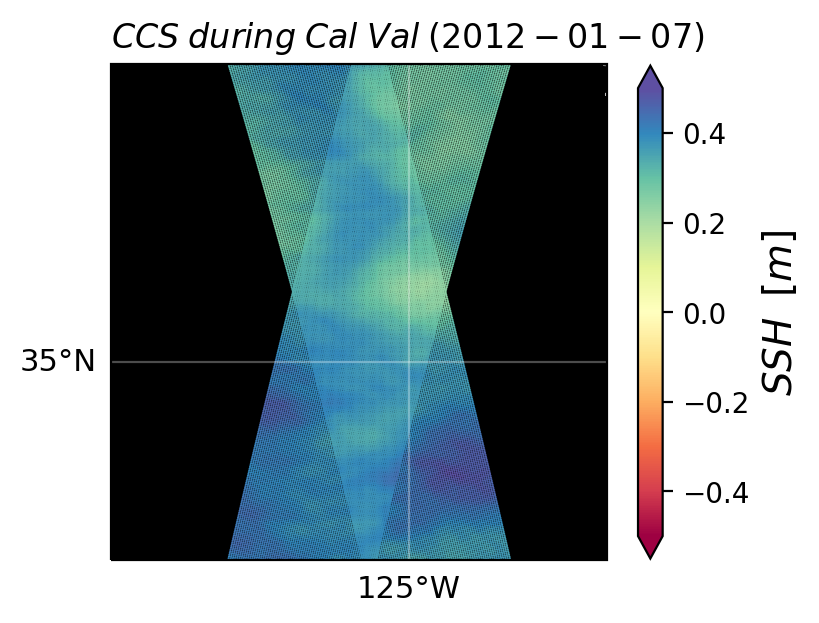

In [9]:
# cmap = plt.get_cmap("bwr_r", 30)
# cmap=custom_divmap

fig, ax = plt.subplots(figsize=(4,4),subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0.)},dpi=200)

ax.set_extent([220, 240,20, 40],crs=ccrs.PlateCarree())
# ax.set_extent([-30,-20,50,60],crs=ccrs.PlateCarree())

track_swot = ax.scatter(x=swot_longitude, 
            y=swot_latitude, 
            c=swot_zos,
            s=2.5,
            alpha=1,
            marker='.',
            edgecolors='none',
            cmap="Spectral",
            # latlon=True,
            vmin=-0.5,vmax=0.5)

ax.add_feature(cfeature.LAND,color="lightgrey",zorder=1)
ax.add_feature(cfeature.OCEAN,color="black",zorder=0)
ax.coastlines(lw=0.5)

gridlines = ax.gridlines(
    alpha=0.3,
    color="white",
    draw_labels=True,
    xlocs=np.arange(-160,-110,5),
    ylocs=np.arange(20,50,5),
    # xformatter=cartopy.mpl.ticker.LongitudeFormatter(zero_direction_label=True,),
)
gridlines.right_labels = False
gridlines.top_labels  = False
gridlines.xlabel_style = {'size': 11}
gridlines.ylabel_style = {'size': 11}
ax.set_aspect("equal")

ax.set_title(r'$CCS\;during\;Cal\;Val\;(2012-01-07)$',size=12,loc='left')
plt.colorbar(track_swot, ax=ax,extend="both",shrink=0.8,aspect=20,pad=0.05).set_label(size=14,label=r'$SSH \;\; [m]$',)

# plt.savefig("map.png",transparent=True)

ax.set_ylim(33,38)
ax.set_xlim(-128,-123)


# Visualize model input

In [ ]:
ds_raw = xr.open_dataset("/home/bellemva/CCS/data/NR/ssh_raw_2012-01-01.nc")

In [ ]:
plt.pcolormesh(ds_raw.lon.values,
               ds_raw.lat.values,
               ds_raw.ssh[0].values)